# Performance analysis of BERT for feature extraction

## Eclipse project

| Parameter     | Value         |
| ------------- |:-------------:|
| Model         | bert-base-uncase |
| Tokens        | 128     |
| Threshold     | median      |


In [26]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border: 1px solid lightgray;
    }
</style>

In [27]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

import pandas as pd

import plot_helper  as ph
import stats_helper as sh
%matplotlib inline

projects    = ['eclipse', 'freedesktop', 'gnome', 'gcc', 'mozilla', 'winehq']
classifiers = {'knn':0, 'nb':1, 'nn':2, 'rf':3, 'svm':4}
print('setup completed')


setup completed


## Performance analysis in training

### BERT vs. TF-IDF

### Statistical test

In [28]:
for project in projects:
    bert_train_scores = pd.read_csv(f'../../../data/metrics/feature-extraction/20210221_{project}_feature_extraction_bert_train_scores.csv')
    tfidf_train_scores = pd.read_csv(f'../../../data/metrics/feature-extraction/20210221_{project}_feature_extraction_tfidf_train_scores.csv')

    best_bert_train_scores = bert_train_scores.copy()
    best_bert_train_scores.loc[:,['classifier']] = 'bert' + ':' + best_bert_train_scores['classifier']
    best_tfidf_train_scores = tfidf_train_scores.copy()
    best_tfidf_train_scores.loc[:,['classifier']] = 'tf-idf' + ':' + best_tfidf_train_scores['classifier']

    all_train_scores = pd.concat([best_bert_train_scores, best_tfidf_train_scores])
    all_train_scores_pivoted = pd.pivot_table (all_train_scores, index='fold', columns='classifier', values=['balanced_acc'])
    statistical_test_results = sh.make_test(all_train_scores_pivoted, ['bert:knn', 'bert:nb', 'bert:nn', 'bert:svm', 'bert:rf', 'tf-idf:knn', 'tf-idf:nb', 'tf-idf:nn', 'tf-idf:svm', 'tf-idf:rf'])
    statistical_test_results_sliced = statistical_test_results[['classifier1', 'classifier2', 'direction']]
    statistical_test_results_pivoted = statistical_test_results_sliced.pivot(index='classifier1', columns='classifier2', values='direction')
    print(f'Long-lived bug prediction performance statistical test for {project.capitalize()}: BERT versus TF-IDF features')
    display(statistical_test_results_pivoted)

Long-lived bug prediction performance statistical test for Eclipse: BERT versus TF-IDF features


classifier2,bert:knn,bert:nb,bert:nn,bert:rf,bert:svm,tf-idf:knn,tf-idf:nb,tf-idf:nn,tf-idf:rf,tf-idf:svm
classifier1,,,,,,,,,,
bert:knn,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$-$
bert:nb,$\leftarrow$,$-$,$\leftarrow$,$-$,$-$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$
bert:nn,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$
bert:rf,$\leftarrow$,$-$,$\leftarrow$,$-$,$-$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$
bert:svm,$\leftarrow$,$-$,$\leftarrow$,$-$,$-$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$
tf-idf:knn,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$
tf-idf:nb,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$-$,$\uparrow$,$\uparrow$
tf-idf:nn,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$-$,$\uparrow$,$\uparrow$
tf-idf:rf,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$-$


Long-lived bug prediction performance statistical test for Freedesktop: BERT versus TF-IDF features


classifier2,bert:knn,bert:nb,bert:nn,bert:rf,bert:svm,tf-idf:knn,tf-idf:nb,tf-idf:nn,tf-idf:rf,tf-idf:svm
classifier1,,,,,,,,,,
bert:knn,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$-$,$\uparrow$,$\uparrow$
bert:nb,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
bert:nn,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$
bert:rf,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$-$,$\leftarrow$,$-$,$\leftarrow$,$-$,$\uparrow$
bert:svm,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$-$,$\leftarrow$,$-$,$\leftarrow$,$-$,$\uparrow$
tf-idf:knn,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$-$,$\uparrow$,$\uparrow$
tf-idf:nb,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$-$,$\leftarrow$,$-$,$\leftarrow$,$-$,$\uparrow$
tf-idf:nn,$-$,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$-$,$\uparrow$,$\uparrow$
tf-idf:rf,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$-$,$\leftarrow$,$-$,$\leftarrow$,$-$,$\uparrow$


Long-lived bug prediction performance statistical test for Gnome: BERT versus TF-IDF features


classifier2,bert:knn,bert:nb,bert:nn,bert:rf,bert:svm,tf-idf:knn,tf-idf:nb,tf-idf:nn,tf-idf:rf,tf-idf:svm
classifier1,,,,,,,,,,
bert:knn,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$-$,$-$,$\leftarrow$,$-$,$\uparrow$
bert:nb,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$\leftarrow$,$-$,$\uparrow$
bert:nn,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$
bert:rf,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$-$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$
bert:svm,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$-$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$
tf-idf:knn,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
tf-idf:nb,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$\leftarrow$,$-$,$\uparrow$
tf-idf:nn,$\uparrow$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$
tf-idf:rf,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$\leftarrow$,$-$,$\uparrow$


Long-lived bug prediction performance statistical test for Gcc: BERT versus TF-IDF features


classifier2,bert:knn,bert:nb,bert:nn,bert:rf,bert:svm,tf-idf:knn,tf-idf:nb,tf-idf:nn,tf-idf:rf,tf-idf:svm
classifier1,,,,,,,,,,
bert:knn,$-$,$-$,$-$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
bert:nb,$-$,$-$,$-$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
bert:nn,$-$,$-$,$-$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
bert:rf,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\uparrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\uparrow$,$-$
bert:svm,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$
tf-idf:knn,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
tf-idf:nb,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$\leftarrow$,$\uparrow$,$-$
tf-idf:nn,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$
tf-idf:rf,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\uparrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\leftarrow$


Long-lived bug prediction performance statistical test for Mozilla: BERT versus TF-IDF features


classifier2,bert:knn,bert:nb,bert:nn,bert:rf,bert:svm,tf-idf:knn,tf-idf:nb,tf-idf:nn,tf-idf:rf,tf-idf:svm
classifier1,,,,,,,,,,
bert:knn,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$\leftarrow$,$-$,$-$
bert:nb,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$\leftarrow$,$-$,$-$
bert:nn,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
bert:rf,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\uparrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$
bert:svm,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$
tf-idf:knn,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
tf-idf:nb,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$\leftarrow$,$-$,$\uparrow$
tf-idf:nn,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$
tf-idf:rf,$-$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$\leftarrow$,$-$,$\leftarrow$,$-$,$\uparrow$


Long-lived bug prediction performance statistical test for Winehq: BERT versus TF-IDF features


classifier2,bert:knn,bert:nb,bert:nn,bert:rf,bert:svm,tf-idf:knn,tf-idf:nb,tf-idf:nn,tf-idf:rf,tf-idf:svm
classifier1,,,,,,,,,,
bert:knn,$-$,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$
bert:nb,$\leftarrow$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$-$,$\uparrow$,$\uparrow$
bert:nn,$-$,$\uparrow$,$-$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$
bert:rf,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\uparrow$,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
bert:svm,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\leftarrow$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
tf-idf:knn,$\leftarrow$,$-$,$\leftarrow$,$-$,$\uparrow$,$-$,$\uparrow$,$\leftarrow$,$\uparrow$,$\uparrow$
tf-idf:nb,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\leftarrow$,$-$,$-$
tf-idf:nn,$\leftarrow$,$-$,$\leftarrow$,$\uparrow$,$\uparrow$,$\uparrow$,$\uparrow$,$-$,$\uparrow$,$\uparrow$
tf-idf:rf,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$\leftarrow$,$-$,$\leftarrow$,$-$,$\leftarrow$


## Performance analysis in testing

### BERT vs. TF-IDF

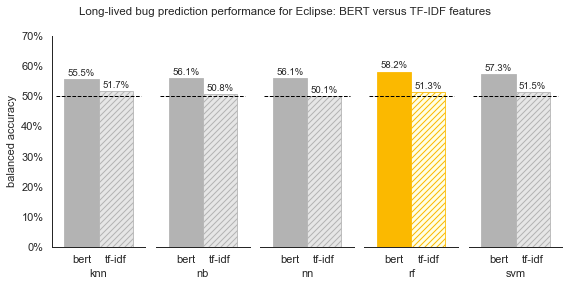

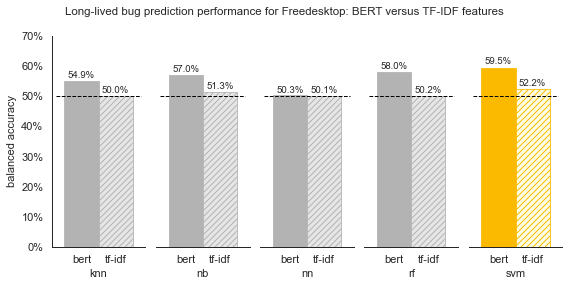

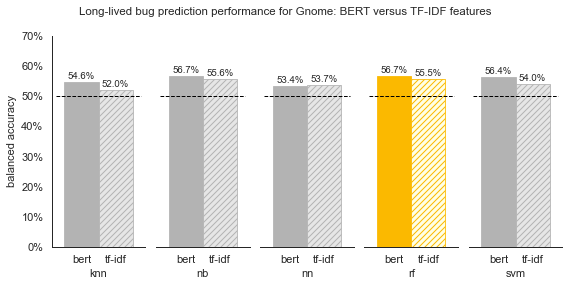

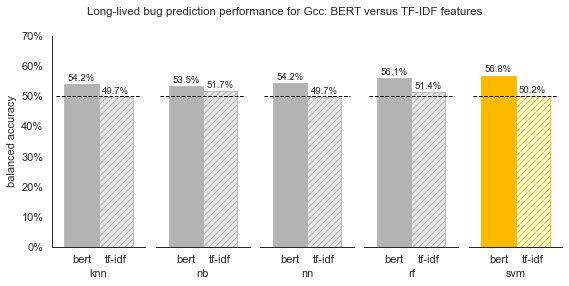

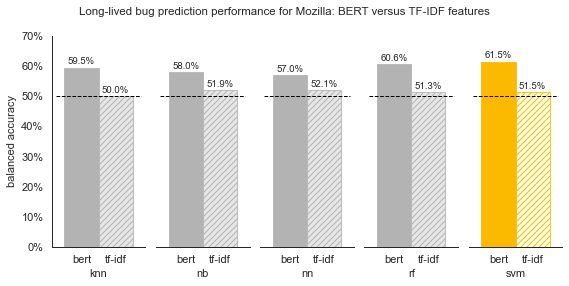

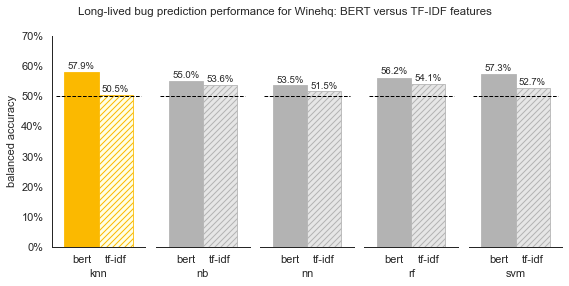

In [29]:
ph.set_style()
classifiers_list = list(classifiers.keys())
for project in projects:
    test_scores_bert  = pd.read_csv(f'../../../data/metrics/feature-extraction/20210221_{project}_feature_extraction_bert_test_scores.csv')
    test_scores_tfidf = pd.read_csv(f'../../../data/metrics/feature-extraction/20210221_{project}_feature_extraction_tfidf_test_scores.csv')
    test_scores = pd.concat([test_scores_bert, test_scores_tfidf])
    
    best_balanced_acc_row = test_scores['balanced_acc'].argmax()
    best_classifier = test_scores.iloc[best_balanced_acc_row, 1]
    
    fig, axes =ph.plot_stacked_bar(test_scores, classifiers_list)
    ph.make_labels(fig, axes, project, classifiers_list)
    ph.set_size(fig)
    ph.color_bars(axes, ph.get_colors(), classifiers[best_classifier])